In [ ]:
# Importing Necessary Libraries
import google
import numpy
import pandas  ddd
import tensorflow 
import sklearn
import matplotlib

In [ ]:
# Kaggle API Authentication
!pip install -q kaggle
google.colab.files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [ ]:
# Downloading and Unzipping The Dataset
!kaggle datasets download -d shayanfazeli/heartbeat
!unzip -q heartbeat.zip

 90% 89.0M/98.8M [00:01<00:00, 67.0MB/s]
100% 98.8M/98.8M [00:01<00:00, 81.8MB/s]


In [ ]:
# Dividing The Dataset Into Training and Testing Subsets
training_dataset = pandas.read_csv("/content/mitbih_train.csv", header = None)
testing_dataset = pandas.read_csv("/content/mitbih_test.csv", header = None)

In [ ]:
# Examining The Training Dataset Class Distribution
print("Training Dataset Class Distribution:\n\n{}".format(training_dataset[187].value_counts()))

Training Dataset Class Distribution:

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


In [ ]:
# Resampling The Training Dataset
df_1 = training_dataset[training_dataset[187] == 1]
df_2 = training_dataset[training_dataset[187] == 2]
df_3 = training_dataset[training_dataset[187] == 3]
df_4 = training_dataset[training_dataset[187] == 4]
df_0 = (training_dataset[training_dataset[187] == 0]).sample(n = 20000,random_state = 42)

df_1_upsample = sklearn.utils.resample(df_1, replace = True, n_samples = 20000, random_state = 123)
df_2_upsample = sklearn.utils.resample(df_2, replace = True, n_samples = 20000, random_state = 124)
df_3_upsample = sklearn.utils.resample(df_3, replace = True, n_samples = 20000, random_state = 125)
df_4_upsample = sklearn.utils.resample(df_4, replace = True, n_samples = 20000, random_state = 126)

training_dataset = pandas.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [ ]:
# Examining The Updated Training Dataset Class Distribution
print("Updated Training Dataset Class Distribution:\n\n{}".format(training_dataset[187].value_counts()))

Updated Training Dataset Class Distribution:

1.0    20000
3.0    20000
4.0    20000
2.0    20000
0.0    20000
Name: 187, dtype: int64


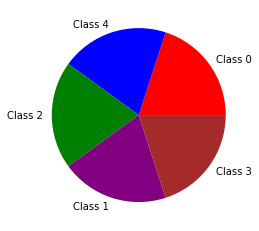

In [ ]:
# Visualizing The Training Dataset Class Distribution
matplotlib.pyplot.figure()
matplotlib.pyplot.pie(training_dataset[187].value_counts(), labels = ["Class 0", "Class 4", "Class 2", "Class 1", "Class 3"], colors = ["red", "blue", "green", "purple", "brown"])
matplotlib.pyplot.show()

In [ ]:
# Splitting The Training and Testing Datasets Into Input and Output Arrays
X_train = numpy.array(training_dataset.iloc[:, :187])
X_test = numpy.array(testing_dataset.iloc[:, :187])

y_train = numpy.array(tensorflow.keras.utils.to_categorical(training_dataset[187]))
y_test = numpy.array(tensorflow.keras.utils.to_categorical(testing_dataset[187]))

In [ ]:
# Adding Noise to the Input Training Arrays to Prevent Overfitting
def add_noise(signal):
  noise = numpy.random.normal(0, 0.01, 187)
  return (signal + noise)

X_train = add_noise(X_train)

In [ ]:
# Initializing The Model
model = tensorflow.keras.models.Sequential([
        tensorflow.keras.layers.Dense(units = 256, activation = "relu", input_shape = (187,)),
        tensorflow.keras.layers.Dense(units = 256, activation = "relu"),
        tensorflow.keras.layers.Dense(units = 256, activation = "relu"),
        tensorflow.keras.layers.Dense(units = 5, activation = "softmax")
])

In [ ]:
# Compiling The Model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.3213 - accuracy: 0.8810
Epoch 2/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.1559 - accuracy: 0.9439
Epoch 3/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.1105 - accuracy: 0.9610
Epoch 4/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0866 - accuracy: 0.9695
Epoch 5/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0712 - accuracy: 0.9755
Epoch 6/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0618 - accuracy: 0.9783
Epoch 7/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0547 - accuracy: 0.9809
Epoch 8/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0486 - accuracy: 0.9836
Epoch 9/20
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0442 - accuracy: 0.9849
Epoch 10/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.040

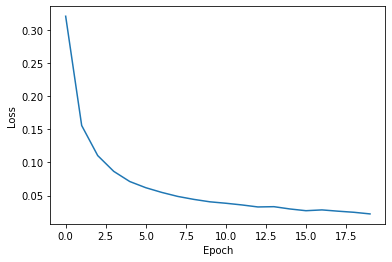

In [ ]:
# Visualizing The Optimization
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(model.history.epoch, model.history.history["loss"])
matplotlib.pyplot.xlabel("Epoch")
matplotlib.pyplot.ylabel("Loss")
matplotlib.pyplot.show()

In [ ]:
# Examining The Testing Accuracy
print("Testing Accuracy: {}%".format(((model.evaluate((X_test), y_test))[1] * 100)))

685/685 [==============================] - 1s 1ms/step - loss: 0.2111 - accuracy: 0.9676
Testing Accuracy: 96.7568039894104%


In [ ]:
# Visualizing a Random Prediction
def visualize_prediction(example): 
  matplotlib.pyplot.figure()
  matplotlib.pyplot.plot(range(187), X_test[example])
  classes = {0: "Normal Beat",
             1: "Supraventricular Ectopic Beats",
             2: "Ventricular Ectopic Beats",
             3: "Fusion Beats",
             4: "Unkown Beats"}
  prediction = classes[model.predict(X_test[example].reshape(1, 187,)).argmax()]
  matplotlib.pyplot.xticks([])
  matplotlib.pyplot.xlabel("Prediction: {}\nActual: {}".format(prediction, classes[y_test[example].argmax()]))
  matplotlib.pyplot.yticks([])
  matplotlib.pyplot.show()

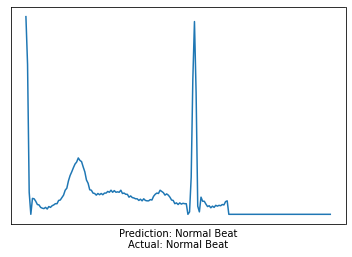

In [ ]:
# Visualizing Prediction for Normal Beats
visualize_prediction(example = 0)

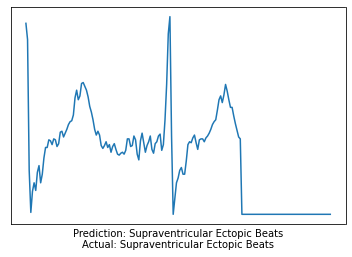

In [ ]:
# Visualizing Prediction for Supraventricular Ectopic Beats
visualize_prediction(example = 18500)

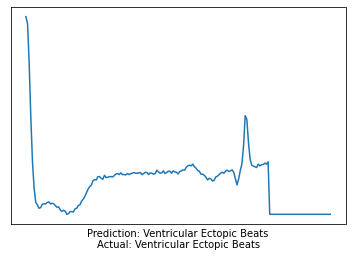

In [ ]:
# Visualizing Prediction for Ventricular Ectopic Beats
visualize_prediction(example = 20000)

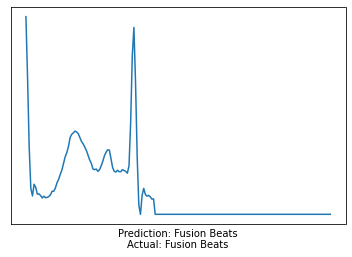

In [ ]:
# Visualizing Prediction for Fusion Beats
visualize_prediction(example = 20200)

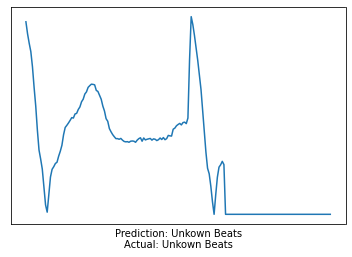

In [ ]:
# Visualizing Prediction for Unknown Beats
visualize_prediction(example = 21891)

In [ ]:
model.save("MIT-BIH_Neural_Network.h5")